In [81]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir, mkdir
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "GAIA"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")
data_dir

Creating GAIA dir in Data dir


'/home2/s20321005/Thesis-Project/Data/GAIA'

In [53]:
# load Gaia-2MASS
name = "Gaia-2MASS"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-004-005.hdf5'],
 360)

In [5]:
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.81102679181763,4885.6157,4807.968,5140.507,4.706,4.6177,4.7477,-0.8927,-1.0705,-0.488,990.8027,918.4789,1238.6727,0.5979,0.5382,0.7565,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
"470,994,550",359.851795,89.1772,12.139,

masalah
gaia-241-242
gaia-242-243

In [ ]:
for file in gaia_files:
  gaia = vaex.open(file)
  gaia_clean = (gaia.filter("parallax > 0")
                    .filter("e_parallax/parallax < 0.15")
                    .filter("bpmag - rpmag > -3")
                    .filter("bpmag - rpmag < 6")
                    .filter("gmag > 3")
                    .filter("gmag < 21")
                    .filter("fb_over_err > 10")
                    .filter("fr_over_err > 10")
                    .filter("ruwe < 1.4")
                    .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
                    .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
                    .filter("Jmag < 13.5")
                    .filter("Jmag > 0")
               )
  ph_qual_filter = gaia_clean['ph_qual'].str.contains('^A.+A$')
  gaia_clean = gaia_clean[ph_qual_filter]
  gaia_clean = gaia_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(gaia_clean)}, raw: {len(gaia)}, {np.round(len(gaia_clean)/len(gaia)*100,2)}%")
  # break
  if (len(gaia_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    gaia_clean.export(join(data_dir, name), progress=True)

gaia-000-001.hdf5, clean: 42213, raw: 153703, 27.46%
export(hdf5) [----------------------------------------]  0.00% estimated time: unknown                 

# 2MASS

In [68]:
twomass_files = glob(join(root_data_dir, 'TWOMASS', '*hdf5'))
twomass_files.sort()
twomass_files[:5], len(twomass_files)

(['/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-004-005.hdf5'],
 360)

In [37]:
twomass_raw = vaex.open_many(twomass_files)
twomass_raw

#,ra,dec,Jmag,Kmag,designation,ph_qual
0,323.000417,-89.627754,14.8,14.056,21320010-8937399,AAA
1,323.00712,-89.344002,15.458,14.692,21320170-8920384,AAB
2,323.021616,-89.331726,15.98,15.064,21320518-8919542,ACU
3,323.035338,-89.370499,15.853,15.301,21320848-8922137,ACC
4,323.051178,-89.014748,16.516,15.278,21321228-8900530,BUU
...,...,...,...,...,...,...
"470,994,547",56.802624,89.421417,16.386,16.883,03471262+8925171,CUU
"470,994,548",56.857783,89.041115,15.716,15.038,03472586+8902280,AAC
"470,994,549",56.873918,89.492081,14.466,13.651,03472974+8929314,AAA
"470,994,550",56.908476,89.292648,15.061,14.058,03473803+8917335,AAA


In [70]:
for file in twomass_files:
  twomass = vaex.open(file)
  ph_qual_filter = twomass['ph_qual'].str.contains('^A.+A$')
  twomass_clean = twomass[ph_qual_filter]
  twomass_clean = twomass_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(twomass_clean)}, raw: {len(twomass)}, {np.round(len(twomass_clean)/len(twomass)*100,2)}%")
  break
  # if (len(gaia_clean)) == 0:
  #   print(f"RUSAK: {name}")
  # else:
  #   gaia_clean.export(join(data_dir, name), progress=True)

tmass-000-001.hdf5, clean: 212685, raw: 505425, 42.08%


In [72]:
# load Gaia-2MASS
gaia_files = glob(join(data_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/GAIA/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-004-005.hdf5'],
 360)

In [74]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
1,0.268558,-89.71653,15.169,14.209,AAA,4611708008660299264,17.08801,15.516851761166475,0.081242345,-7.157333249113848,0.07781357,1.2855724542192457,0.06615926,17.507706,18.50154,16.532976,61.309105,194.06754,0.9743772,1.3233652,nan,nan,303.0014568841523,-27.404831574405826,4000.4795,3970.193,4025.0796,4.6917,4.6815,4.7024,-0.1676,-0.2143,-0.133,624.159,607.684,638.4129,0.513,0.4907,0.5373,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
2,0.327497,-89.604843,14.467,13.897,AAA,4611756666346916608,11.962077,11.959451023884371,0.03853043,-0.2506200813959305,0.039527666,1.2014889639723023,0.03368798,16.238325,16.844652,15.491733,303.80627,485.42157,0.9982022,1.2521327,nan,nan,303.02852448145194,-27.513937804791933,4657.589,4606.348,4848.5005,4.5156,4.4864,4.5506,-0.6166,-0.7381,-0.3229,829.9258,794.6751,858.8108,0.3092,0.2683,0.4197,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
3,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K
4,0.34258,-89.657608,14.428,13.751,AAA,4611709181188492928,6.5878043,4.821691903032647,0.034149557,-4.4889254028881815,0.034355145,0.8222923699537003,0.030214705,15.962487,16.491627,15.286262,229.36317,409.8019,0.9597021,1.2301626,nan,nan,303.01551745721014,-27.46239540245029,4887.0454,4839.9053,5161.509,4.1988,4.1877,4.273,-0.6894,-0.7505,-0.4165,1388.719,1307.4613,1527.9545,0.2559,0.2211,0.4355,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95,846,236",359.970466,88.737274,14.337,14.017,AAA,2305485362993494272,5.9842353,-3.7459772200876946,0.027847607,4.666768249581793,0.032427505,0.4818880416017539,0.025802184,15.701931,16.125746,15.101985,418.7069,581.8909,1.0418484,1.2223039,nan,nan,122.61882569054515,25.897000138861088,6022.1064,5986.6094,6050.8413,4.0442,4.0104,4.0844,-0.7525,-0.7887,-0.7188,1861.25,1768.7795,1946.3923,0.6202,0.6022,0.6343,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
"95,846,237",359.971839,88.858238,14.359,13.789,AAA,2305490791832146176,6.023284,-4.658651865321294,0.03641703,3.8179721161799662,0.043149,0.565193661054081,0.03205608,16.097435,16.608368,15.375303,271.03342,184.76584,1.0021702,1.2715838,nan,nan,122.64846776780044,26.014949168849604,5518.624,5494.953,5540.146,4.3759,4.3537,4.4006,0.0424,0.016,0.0696,1330.0165,1281.0458,1374.9747,0.6127,0.5996,0.6246,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"95,846,238",359.976076,88.295692,15.296,14.565,AAA,2304698314530540544,8.526238,-6.681311790927

In [78]:
gaia_filt = gaia.filter("1000/parallax < 200").filter("Jmag < 13.5")
gaia_filt = gaia_filt.extract()
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.349428,-87.286697,13.342,12.504,AAA,4613169263910267648,28.896265,-20.363268298817935,0.0349017,20.501986551704896,0.036540687,5.65436610234745,0.030230137,15.7302065,16.821856,14.690968,221.24786,873.7865,1.0606179,1.3615878,nan,nan,303.60893449890204,-29.775569665644316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
1,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,32.419907,1.021693,303.8348243897451,-30.70014661878395,3918.3796,3912.4084,3927.0107,4.7637,4.7592,4.7742,-0.4165,-0.4555,-0.3767,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,-0.26,-0.4,-0.08,0.08,0.03,0.15,nan,nan,nan,M
2,0.903341,-85.30706,11.899,11.014,AAA,4617335038589894144,11.355395,0.795127899597883,0.017387299,11.327523034417796,0.018469324,5.548097461641748,0.015314708,14.1822195,15.2203455,13.172319,766.55273,1627.3412,1.0778424,1.3457708,-8.975389,2.3655987,304.0735833777208,-31.714742619574125,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
3,0.569944,-84.4646,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,48.249413,1.7350472,304.32741295603,-32.529903756744375,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,0.610426,-84.752228,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,nan,nan,304.2467752509446,-32.250324892783674,3588.7627,3585.169,3592.291,4.7719,4.7636,4.778,-0.0376,-0.0539,-0.0203,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"786,780",359.373887,83.330894,12.587,11.754,AAA,2287546212311926272,13.803087,-7.896966206447448,0.021183645,-11.320915900107204,0.021454073,6.05010141197803,0.017634373,14.890155,15.952197,13.868731,415.1433,1120.6245,1.0598668,1.3510827,23.826464,3.925776,121.27356568412532,20.633508072881504,3845.3945,3843.5183,3847.0542,4.7178,4.7109,4.7209,-0.0379,-0.0477,-0.0312,165.649,165.0286,166.6534,0.4335,0.4301,0.437,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
"786,781",359.588799,83.638062,13.062,12.2,AAA,2287753401533966720,35.243202,-19.120945228410232,0.037845388,29.605284714289677,0.037265524,6.09986681406902,0.032651093,15.986361,17.521433,14.780454,125.22024,607.16144,0.9854036,1.4545044,nan,nan,121.3713705998854,20.92792126368948,3479.702,3475.8245,3483.4922,4.7549,4.75,4.7588,0.1533,0.1459,0.1597,163.3713,162.5458,164.1664,0.5682,0.5621,0.5743,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
"786,782",359.91543,84.939949,12.135,11.276,AAA,2300120845762615552,21.81658,-18.09557851104182,0.02244882,12.186600138706089,0.018390706,7.834634058984513,0.017666232,14.639393,15.845925,13.552225,462.4528,1211.1454,1.0363508,1.384423,-58.935833,3.561176,121.70922759407681,22

In [79]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180

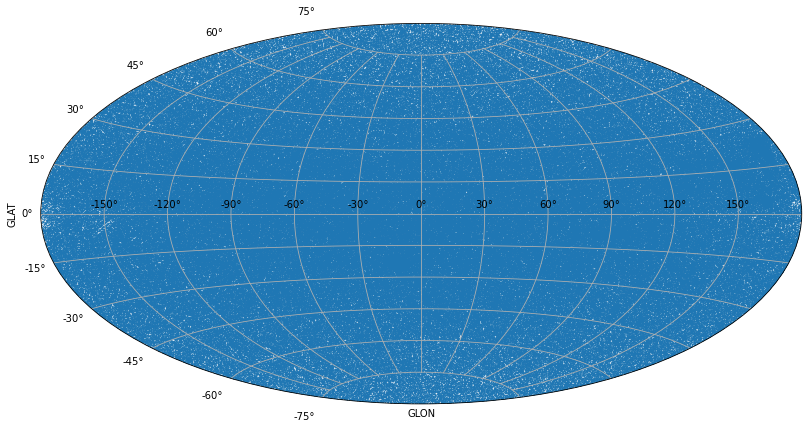

In [82]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=1)
plt.grid(True)
plt.show()